# Area under curve
This notebook explores our functions for area under curve, and finding the maximum point in a breath

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import pandas as pd
from scipy.signal import savgol_filter

In [3]:
## Grabbing the loca version appears in cell below, but you should use v0.0.7 loaded

In [4]:
# sys.path.insert(0, '../resurfemg')
# import helper_functions as hf

In [5]:
import resurfemg.helper_functions as hf

In [6]:
array = np.array([0,1,1,1,1,10,1,2,3,4,10,4,1,0,0,0,0])
array1 = np.hstack((array, array))
array2 = np.hstack(( array1, np.array([20,20,20])))
array = np.hstack((array2, array1))

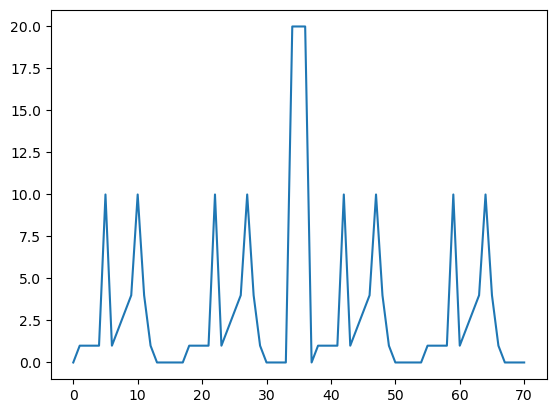

In [7]:
plt.plot(array)

In [8]:
array[70]

0

In [9]:
def hi_envelope(our_signal, dmax=24):
    """
    Takes a 1d signal array, and extracts 'high'envelope,
    then makes high envelope, based on connecting peaks
    dmax: int, size of chunks,

    :param our_signal: 1d signal array usually of emg
    :type our_signal: ~numpy.ndarray
    :param dmax: legnth of chunk to look for local max in
    :type dmax: int

    :returns: src_signal_gated, the gated result
    :rtype: ~numpy.ndarray
    """
    # locals max is lmax
    lmax = (np.diff(np.sign(np.diff(our_signal))) < 0).nonzero()[0] + 1
    lmax = lmax[
        [i+np.argmax(
            our_signal[lmax[i:i+dmax]]
        ) for i in range(0, len(lmax), dmax)]
    ]
    smoothed = savgol_filter(our_signal[lmax], 3, 2)
    smoothed_interped = signal.resample(smoothed, len(our_signal))

    return smoothed_interped



In [10]:
def find_peak_in_breath(array, start_index, end_index, smooth_algorithm='none'):
    """
    This algorithm should be applied to breaths longer than 60 values on an index. 
    The mid_savgol assumes a parabolic fit. It is reccomended to test a smoothing
    algorithm first, apply, then run the find peak algorithm.
    
    """
    new_array = array[start_index: (end_index+1)]
    if smooth_algorithm == 'mid_savgol':
        new_array = savgol_filter(
            new_array, int(len(new_array)),
            2,
            deriv=0,
            delta=1.0,
            axis=- 1,
            mode='interp',
            cval=0.0)
    #new_array = abs(new_array)
        max_ind =(new_array.argmax())
        max_val = new_array[max_ind]
    else:
        max_ind =(new_array.argmax())
        max_val = new_array[max_ind]
    return (max_ind, max_val)
        

In [11]:


def area_under_curve(
    array,
    start_index,
    end_index,
    end_curve=0,
    smooth_algorithm='none',
):
    """
    This algorithm should be applied to breaths longer than 60 values
    on an index. The mid_savgol assumes a parabolic fit. It is
    reccomended to test a smoothing algorithm first, apply,
    then run the area_under the curve with none for smooth_algortihm.
    If a cutoff of the curve before it hits bottom is desired then a value
    other than zero must be in end_curve variable. This variable
    should be written from 0 to 100 for the perfentage of the max value
    at which to cut off after the peak.

    :param array: an array e.g. single lead EMG recording
    :type array: np.array
    :param start_index: which index number the breath starts on
    :type start_index: int
    :param end_index: which index number the breath ends on
    :type end_index: int
    :param end_curve: percentage of peak value to stop summing at
    :type end_curve: float
    :param smooth_algorithm: algorithm for smoothing
    :type smooth_algorithm: str

    :returns: area; area under the curve
    :rtype: float
    """

    new_array = array[start_index: (end_index+1)]
    max_ind = (new_array.argmax())
    if end_curve > 100 or end_curve < 0:
        print('You picked an impossible number for end_curve')
        area = 'mistake'
    elif array[start_index] < array[end_index]:
        print('You picked an end point above baseline')
        area = 'mistake'
    else:
        end_curve = end_curve/100
        if smooth_algorithm == 'none':
            absolute_val_array = np.abs(
                new_array[max_ind:] - new_array.max() * end_curve)
            smallest_difference_index = absolute_val_array.argmin()
            smallest_difference_index = smallest_difference_index + max_ind
            area = np.sum(new_array[:smallest_difference_index])
        if smooth_algorithm == 'mid_savgol':
            new_array = savgol_filter(
                new_array,
                int(len(new_array)),
                2,
                deriv=0,
                delta=1.0,
                axis=- 1,
                mode='interp',
                cval=0.0,
            )
            absolute_val_array = np.abs(
                new_array[max_ind:] - new_array.max() * end_curve)
            smallest_difference_index = absolute_val_array.argmin()
            smallest_difference_index = smallest_difference_index + max_ind
            area = np.sum(new_array[:smallest_difference_index])

    return area



In [13]:
start_index = 0
end_index = 70
area_under_curve(array, start_index,end_index, 95.7, smooth_algorithm='mid_savgol')

139.54738260813633

In [14]:
new_array = array [start_index: end_index]
new_array

array([ 0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,  0,  0,  0,
        0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,  0,  0,  0,
       20, 20, 20,  0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,
        0,  0,  0,  0,  1,  1,  1,  1, 10,  1,  2,  3,  4, 10,  4,  1,  0,
        0,  0])

In [15]:
start_index = 0
end_index = 70
hf.area_under_curve(array, start_index,end_index, 95.7, smooth_algorithm='mid_savgol')

143.45223143506655

In [16]:
start_index = 0
end_index = 70
area_under_curve(array, start_index, end_index, 70, smooth_algorithm='mid_savgol')

188.39786733104597

In [17]:
start_index = 0
end_index = 70
hf.area_under_curve(array, start_index, end_index, 70, smooth_algorithm='mid_savgol')

188.39786733104597

In [20]:
test_array = np.array([0,1,2,3,4,5,6,7,8,9,10,9,8,7,6,5,4,3,2,1,0])
len(test_array)

21

In [21]:
test_array[20]

0

In [22]:
sum_to_peak = np.sum(np.array([0,1,2,3,4,5,6,7,8,9,10]))
sum_to_peak 

55

In [23]:
sum_all = np.sum(test_array)
sum_all

100

In [24]:
start_index = 0
end_index = 20
hf.newer_area_under_curve(test_array, start_index, end_index, 7, smooth_algorithm='none')

AttributeError: module 'resurfemg.helper_functions' has no attribute 'newer_area_under_curve'

In [25]:
def newer_area_under_curve(
    array,
    start_index,
    end_index,
    end_curve=99,
    smooth_algorithm='none',
):
    """
    REFACTOR for experimental
    This algorithm should be applied to breaths longer than 60 values
    on an index. The mid_savgol assumes a parabolic fit. It is
    reccomended to test a smoothing algorithm first, apply,
    then run the area_under the curve with none for smooth_algortihm.
    If a cutoff of the curve before it hits bottom is desired then a value
    other than zero must be in end_curve variable. This variable
    should be written from 0 to 100 for the perfentage of the max value
    at which to cut off after the peak.
    :param array: an array e.g. single lead EMG recording
    :type array: np.array
    :param start_index: which index number the breath starts on
    :type start_index: int
    :param end_index: which index number the breath ends on
    :type end_index: int
    :param end_curve: percentage of peak value to stop summing at
    :type end_curve: float
    :param smooth_algorithm: algorithm for smoothing
    :type smooth_algorithm: str
    :returns: area; area under the curve
    :rtype: float
    """
    if not (0 <= end_curve <= 100):
        raise ValueError(
            'end_curve must be between 0 and 100,'
            'but {} given'.format(end_curve),
        )
    if smooth_algorithm not in ('none', 'mid_savgol'):
        raise ValueError(
            'Possible values for smooth_algorithm are none and mid_savgol, '
            'but {} given'.format(smooth_algorithm),
        )

    if array[start_index] < array[end_index]:
        logging.warning(
            'You picked an end point above baseline, '
            'caution with end_curve variable!',
        )

    new_array = array[start_index:end_index + 1]
    max_ind = new_array.argmax()
    end_curve = end_curve / 100

    if smooth_algorithm == 'mid_savgol':
        new_array = savgol_filter(
            new_array,
            len(new_array),
            2,
            deriv=0,
            delta=1.0,
            axis=- 1,
            mode='interp',
            cval=0.0,
        )

    tail = new_array[max_ind:] < new_array.max() * end_curve
    nonzero = np.nonzero(tail)[0]
    end = nonzero[0] if len(nonzero) else new_array.shape[0] - 1
    #return (max_ind + end)
    return np.sum(new_array[:(max_ind + end)])



In [26]:
start_index = 0
end_index = 20
newer_area_under_curve(test_array, start_index, end_index, 70, smooth_algorithm='none')

79